In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import ujson as json
from collect_score_info import get_results
from utils import percent_data, \
    data_behaviour, \
    check_miss_results, \
    moe2name
import torch


from tqdm import tqdm
import numpy as np
from safetensors import safe_open
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
# Set font globally to Times New Roman
plt.rcParams['font.family'] = 'DejaVu Serif'
fontsize = 14


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import ujson as json
from collect_score_info import get_results
from utils import percent_data, \
    data_behaviour, \
    check_miss_results, \
    moe2name
import torch


from tqdm import tqdm
import numpy as np
from safetensors import safe_open
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
# Set font globally to Times New Roman
plt.rcParams['font.family'] = 'DejaVu Serif'
fontsize = 14


In [1]:
import pandas as pd
# Dữ liệu của bảng
data_model = {
    "Model": ["SMoE-R", "Sigmoid Router", "XMoE", "Perturbed Cosine", "Shared MoE V2", "Shared MoE V3", "CompeteSMoE"],
    "PPL ↓": [13.72, 13.68, 14.05, 14.39, 13.71, 13.72, 13.66],
    "LAMBADA ↑": [25.49, 25.78, 24.55, 25.43, 24.60, 25.78, 26.45],
    "BLiMP ↑": [76.03, 77.24, 76.02, 76.10, 75.68, 76.82, 77.47],
    "CBT ↑": [75.40, 75.22, 75.45, 74.21, 75.29, 75.58, 75.51],
    "HellaSwag ↑": [29.00, 29.05, 28.62, 28.66, 29.18, 29.30, 29.10],
    "PIQA ↑": [59.09, 59.03, 58.05, 57.07, 58.71, 58.49, 58.54],
    "ARC - E↑": [32.94, 33.45, 33.28, 31.97, 32.52, 33.40, 33.74],
    "ARC - C↑": [20.94, 20.94, 20.43, 20.17, 20.77, 21.97, 22.40],
    "AVG": [45.56, 45.82, 45.20, 44.80, 45.25, 45.91, 46.17],
    "AVG Rank": [3.94, 2.94, 5.63, 6.25, 4.63, 2.88, 1.75]
}

# Chuyển dữ liệu thành DataFrame
df_model = pd.DataFrame(data_model)

# Đảo bảng (transpose)
df_transposed = df_model.set_index('Model').T


df_transposed
df_transposed.to_excel('file_name.xlsx', index=False)


In [ ]:
df_transposed

In [2]:
with open("/cm/shared/anonymous_H102/toolkitmoe/evaluate/logs/1119_1941_llava_v1.5_mme_llava_model_args_4ef0d8/mme.json", "r") as f:
    data = json.load(f)

In [3]:
domains = {}
for subdata in data['logs']:
    # print(subdata)
    # if subdata['target'].lower() in subdata['filtered_resps'][0].lower():        
    if subdata['domain'][0] not in domains.keys():
        domains[subdata['domain'][0]] = []
    domains[subdata['domain'][0]].append(subdata)

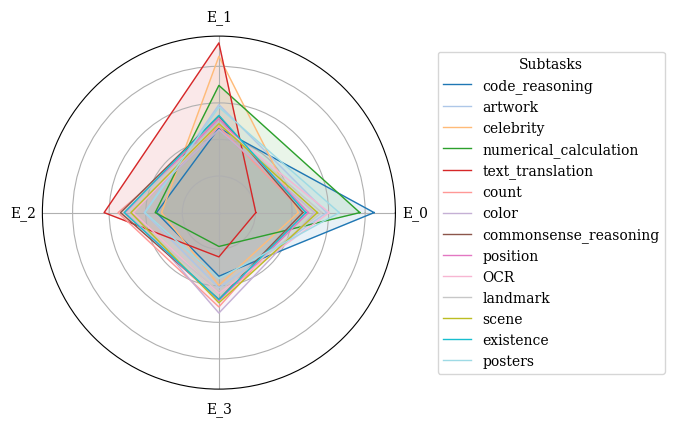

In [7]:
# Define labels and angles for radar plot
labels = [f'E_{i}' for i in range(4)]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

# Generate colors automatically based on the number of subtasks
colors = plt.get_cmap('tab20', len(domains))

# Set up the radar chart
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Plot radar chart for each subtask with auto colors
for i, (subtask, doc) in enumerate(domains.items()):
    experts = []
    for sample in doc:
        # experts.extend(list(np.array(sample['vision_id_experts'][0][0]['26']).flatten()))
        experts.extend([x[0] for x in sample['vision_id_experts'][0][0]['23']])
    # print(subtask)
    # print(len(doc))
    # print(len(experts))
    # print(experts)
    # break
 
    # Count the number of times each expert is chosen (assuming 4 experts)
    total_choices = len(experts)
    expert_counts = [experts.count(expert_id) for expert_id in range(4)]
    # print(experts)
    
    # Convert to percentage
    expert_percentages = [(count / total_choices) * 100 for count in expert_counts]
    stats = expert_percentages + expert_percentages[:1]  # Close the circle
    
    # Plot the radar chart
    ax.plot(angles, stats, linewidth=1, linestyle='solid', label=subtask, color=colors(i))
    ax.fill(angles, stats, alpha=0.1, color=colors(i))

# Remove the percentage labels around the circular border
ax.set_yticklabels([])

# Add labels for the experts
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Add the legend outside the radar chart
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), title="Subtasks")
plt.tight_layout()

plt.savefig("./results/layer26.png")
plt.show()

In [9]:

# Hàm tính entropy dựa trên xác suất
def calculate_entropy(frequencies):
    total_frequency = sum(frequencies)
    if total_frequency == 0:
        return 0
    probabilities = [freq / total_frequency for freq in frequencies]
    entropy = -sum(p * np.log2(p) if p > 0 else 0 for p in probabilities)
    return entropy

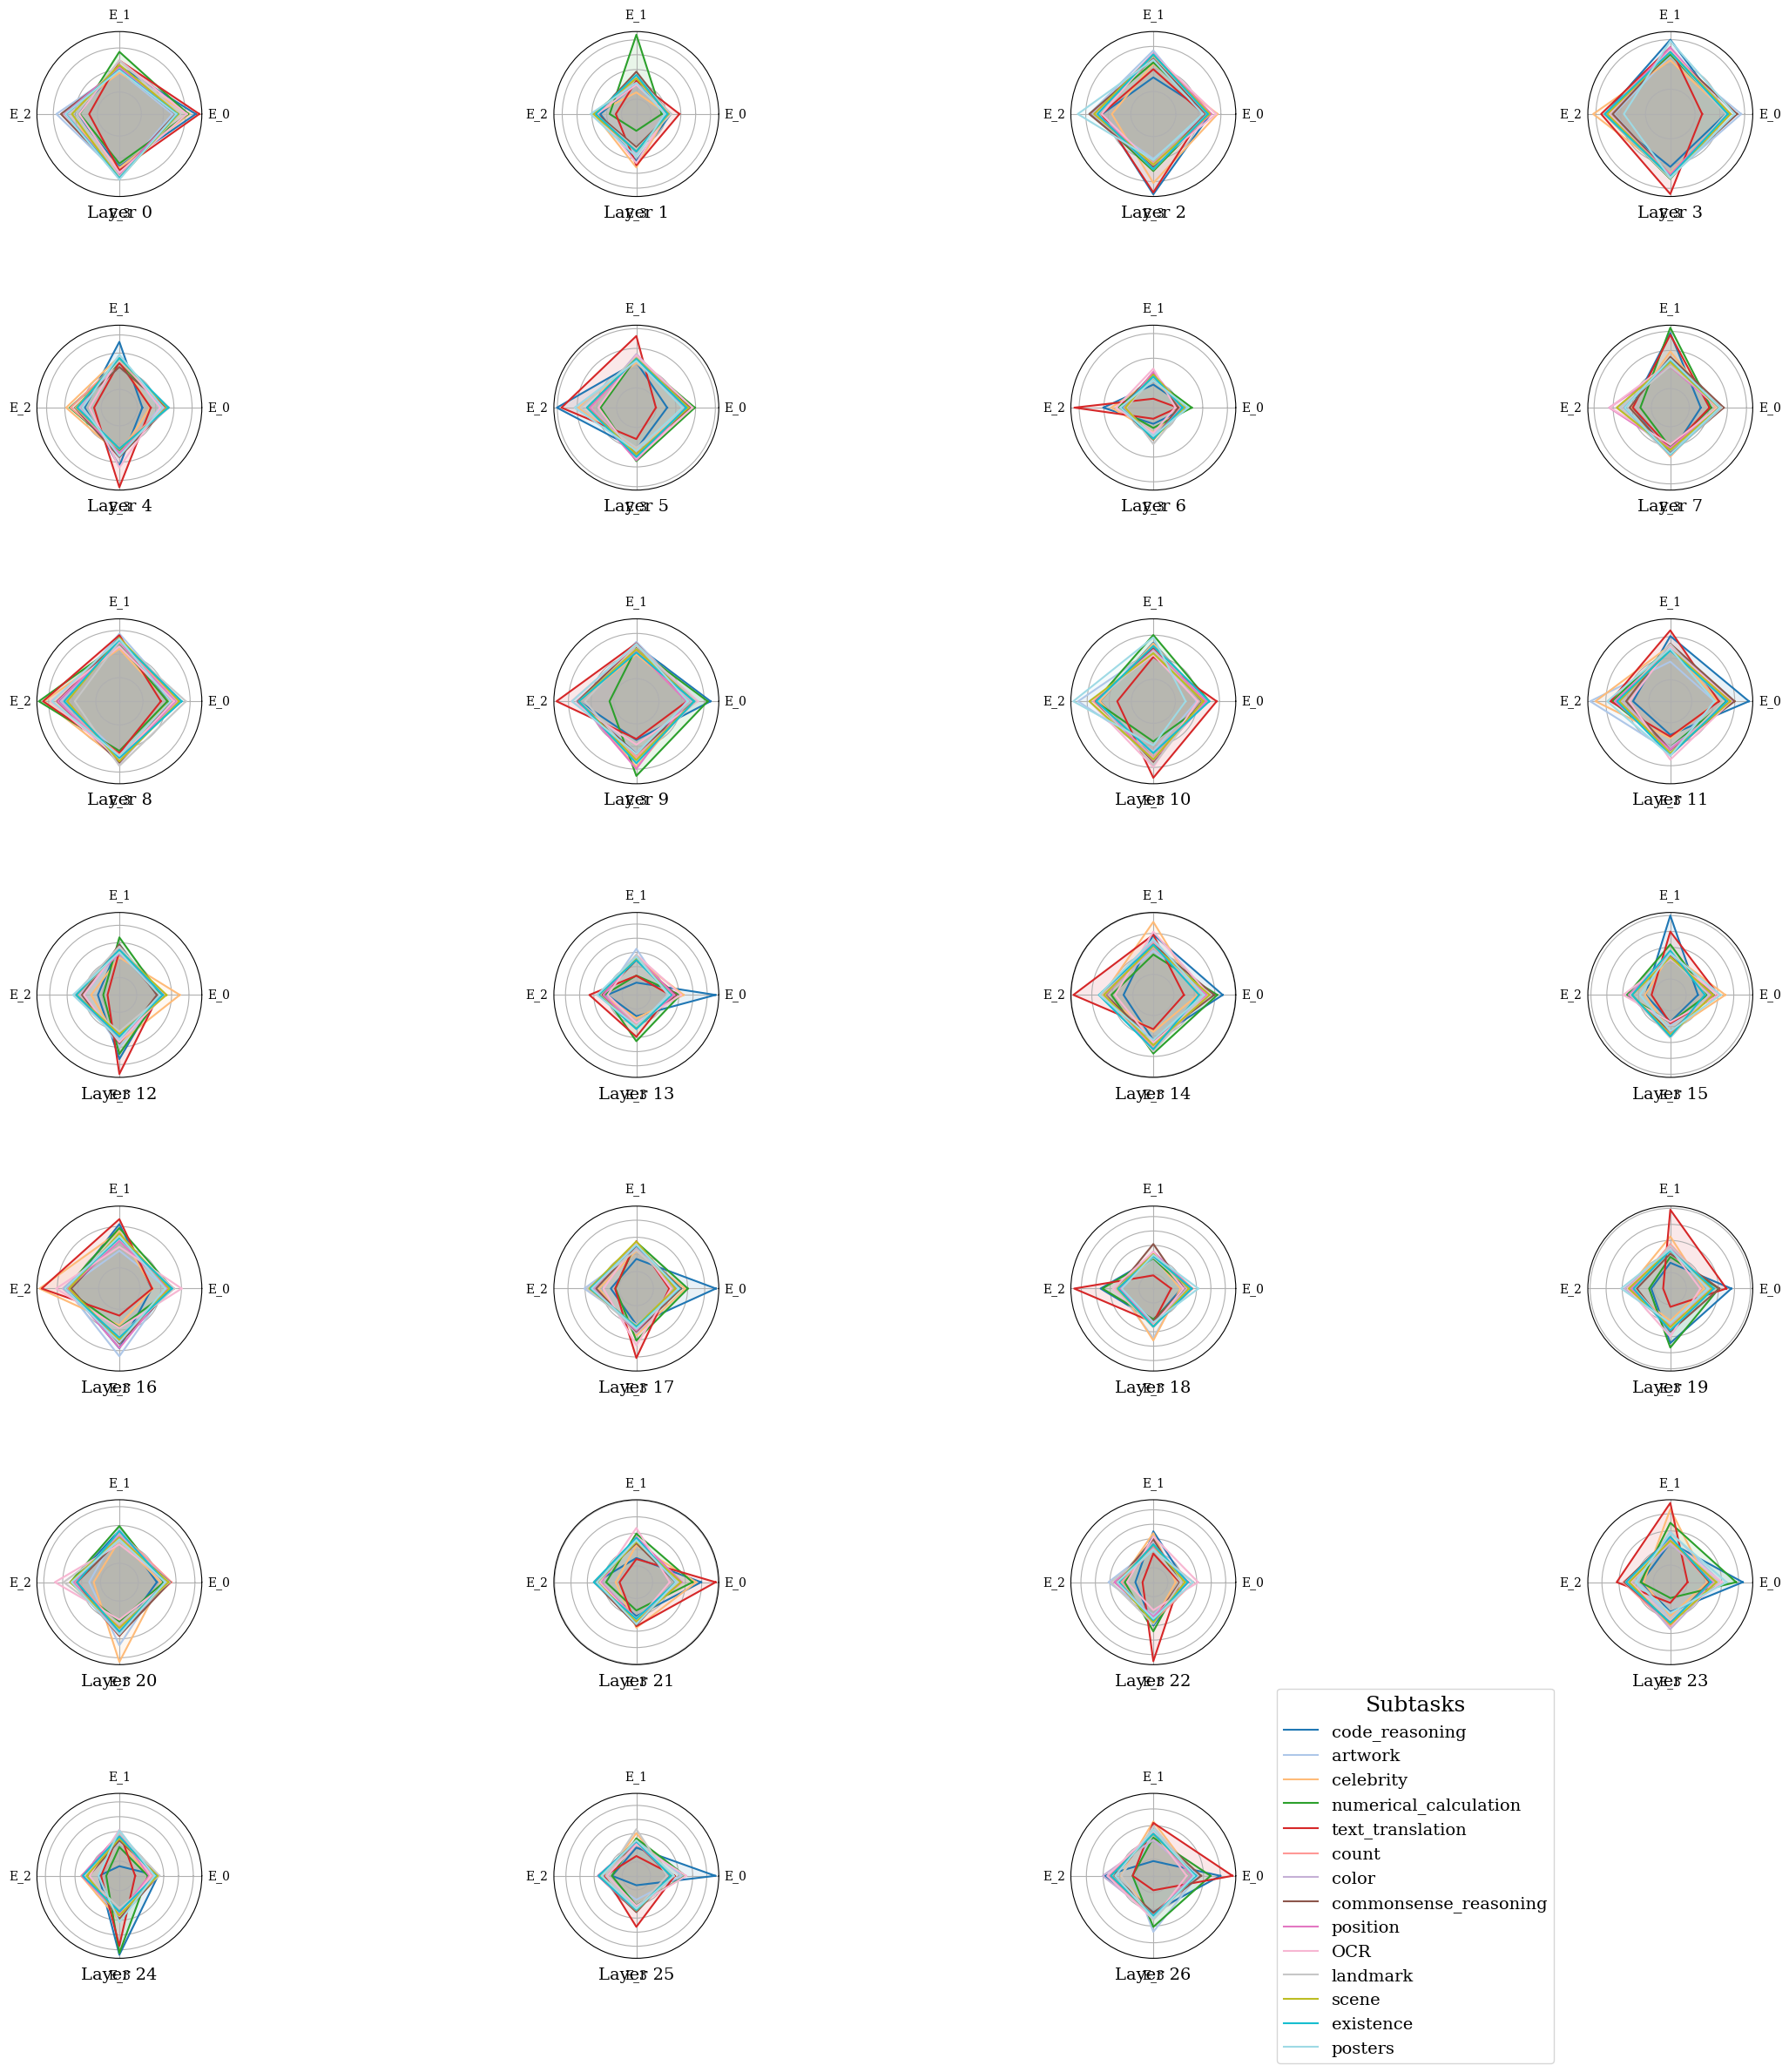

Sorted Average Entropy by Layer (from lowest to highest):
    Layer  Average_Entropy
24     24            1.925
6       6            1.941
19     19            1.945
23     23            1.945
26     26            1.950
22     22            1.954
25     25            1.956
13     13            1.956
12     12            1.959
18     18            1.959


In [15]:
`# Number of layers to plot
num_layers = 27

# Create a grid for subplots with fewer rows and columns
rows, cols = 7, 4  # Adjusted to provide larger cells

# Labels for the radar chart (experts)
labels = [f'E_{i}' for i in range(4)]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

# Increase the figure size to make radar charts larger
fig, axes = plt.subplots(rows, cols, figsize=(20, 25), subplot_kw=dict(polar=True))  # Adjust figsize for larger cells

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Specific layers to plot
layers_to_plot = [i for i in range(num_layers)]
entropy_values = {subtask: [] for subtask in domains.keys()}

# Initialize a list to hold average entropy values for each layer
avg_entropy_per_layer = []

# Plot radar chart for each layer
for i, layer_idx in enumerate(layers_to_plot):
    ax = axes[i]
    layer_entropy_list = []  # To accumulate entropy values for the current layer
    
    # Loop through each subtask and create radar chart for each layer
    for j, (subtask, doc) in enumerate(domains.items()):
        experts = []
        for sample in doc:
            # Access the corresponding layer's data
            experts.extend([x[0] for x in sample['vision_id_experts'][0][0][str(layer_idx)]])
        
        # Count how many times each expert is selected (assuming 4 experts)
        total_choices = len(experts)
        expert_counts = [experts.count(expert_id) for expert_id in range(4)]
        # print(total_choices)
        # print(expert_counts)
        # Convert to percentage
        expert_percentages = [(count / total_choices) * 100 for count in expert_counts]
        
        # Calculate entropy and add to the list for this layer
        entropy_value = calculate_entropy(expert_counts)
        entropy_values[subtask].append(entropy_value)
        layer_entropy_list.append(entropy_value)
        
        # Prepare stats for the radar chart
        stats = expert_percentages + expert_percentages[:1]  # Close the circle
        
        # Plot radar chart for each subtask
        ax.plot(angles, stats, linewidth=1.5, linestyle='solid', label=subtask, color=colors(j))
        ax.fill(angles, stats, alpha=0.1, color=colors(j))

    # Calculate average entropy for the layer and store it
    avg_entropy = round(np.mean(layer_entropy_list), 3)
    avg_entropy_per_layer.append(avg_entropy)

    # Set the title below the chart, closer to the chart
    ax.text(0.5, -0.1, f'Layer {layer_idx}', ha='center', va='center', transform=ax.transAxes, fontsize=fontsize)

    # Remove radial tick labels and set x-tick labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

# Remove any unused subplots
for i in range(len(layers_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Custom legend outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), title="Subtasks", title_fontsize=fontsize + 4, fontsize=fontsize)

# Adjust layout to minimize empty space
plt.subplots_adjust(top=0.9, bottom=0.05, hspace=-0.5, wspace=-0.5)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# # Save the modified figure
# pdf_path = "/cm/shared/anonymous_H102/toolkitmoe/evaluate/analysis/results/eloss_dynamic_moe_ExpertSelectionAcrossLayersandSubtasks_Large.pdf"
# plt.savefig(pdf_path, format='pdf')

plt.show()

# After plotting, analyze the average entropy values
avg_entropy_df = pd.DataFrame({
    'Layer': layers_to_plot,
    'Average_Entropy': avg_entropy_per_layer
})

# Sort by average entropy to find layers with the smallest values
sorted_avg_entropy_df = avg_entropy_df.sort_values(by='Average_Entropy', ascending=True)

# Display the sorted DataFrame
print("Sorted Average Entropy by Layer (from lowest to highest):")
print(sorted_avg_entropy_df.head(10))  # Show top 10 layers with lowest entropy
`

In [12]:
sorted_avg_entropy_df

,Layer,Average_Entropy
24,24,1.925
6,6,1.941
19,19,1.945
23,23,1.945
26,26,1.950
22,22,1.954
25,25,1.956
13,13,1.956
12,12,1.959
18,18,1.959


In [14]:
# '0', '1', '17', '16', '20', '22', '23'

### Đo khả năng flos, common loss, perlexity khi train model per 10 % /332k data

In [ ]:
benchmarks =['ai2d',
 'textvqa_val',
 'gqa',
 'hallusion_bench_image',
 'mathvista_testmini',
 'mmbench_en_dev',
 'mmmu_val',
 'mmstar',
 'pope',
 'scienceqa_full',
 'mme']

In [29]:
if os.path.exists("./results/result_metric.json") == False:
    results = get_results()
else:
    with open("./results/result_metric.json", "r") as f:
        results = json.load(f)
        
check_miss_results(results)

In [30]:
with open("./results/result_metric_sqa.json", "r") as f:
    results_sqa = json.load(f)

In [31]:
for moe in results_sqa['phi3mini-clip'].keys():
    for per in percent_data:
        if 'scienceqa_full' not in results['phi3mini-clip'][moe]:
            results['phi3mini-clip'][moe]['scienceqa_full'] = {}
        results['phi3mini-clip'][moe]['scienceqa_full'][per] = results_sqa['phi3mini-clip'][moe]['scienceqa_full'][per]

In [ ]:

# Extract relevant information for visualization
model_name = "mmerealworld_lite"
checkpoints = list(data["Full_smoe_full_competition"][model_name].keys())
scores = [data["Full_smoe_full_competition"][model_name][checkpoint]["score"] for checkpoint in checkpoints]


{'phi3mini-clip': {'smoe': {'mmbench_en_dev': {'checkpoint-4160': {'score': 63.91752577319587,
     'num_input_tokens_seen': 88530640,
     'total_flos': 2.4783788488576205e+17,
     'path': '/cm/archive/anonymous/toolkitmoe/evaluate/logs/0919_2138_llava...ch_en_llava_model_args_51069b/results.json'},
    'checkpoint-4992': {'score': 66.75257731958763,
     'num_input_tokens_seen': 106246345,
     'total_flos': 2.9739955771355955e+17,
     'path': '/cm/archive/anonymous/toolkitmoe/evaluate/logs/0919_2228_llava...ch_en_llava_model_args_62b454/results.json'},
    'checkpoint-3328': {'score': 64.7766323024055,
     'num_input_tokens_seen': 70870660,
     'total_flos': 1.9854890885762253e+17,
     'path': '/cm/archive/anonymous/toolkitmoe/evaluate/logs/0919_2048_llava...ch_en_llava_model_args_6c5b2f/results.json'},
    'checkpoint-2496': {'score': 64.86254295532646,
     'num_input_tokens_seen': 52857860,
     'total_flos': 1.4816070102469837e+17,
     'path': '/cm/archive/anonymous/toolki

In [33]:
# sqa = {
#     "smoe": 77.50	,
#     "hyperrouter": 77.31,
#     "smoe_sigmoidgating": 77.60	,
#     "smoe_cosinegating": 77.98,
#     "smoe_perturbed": 77.53
# }

In [34]:
# add_sqa = {}

In [35]:
# results['phi3mini-clip'].keys()

In [36]:
score_leadbroad = {}
for moe in ['smoe', 'smoe_sigmoidgating','smoe_cosinegating','hyperrouter', 'smoe_perturbed' ]:
    score_leadbroad[moe] = {}
    for data in benchmarks:
        if data == "scienceqa_full":
            try:
                score_leadbroad[moe][data] = results_sqa['phi3mini-clip'][moe][data]["checkpoint-8316"]['score'] 
                # add_sqa[moe] = sqa[moe] - results['phi3mini-clip'][moe][data]['checkpoint-8316']['score'] 
            except:
                print(data, moe)
        else:
            score_leadbroad[moe][data] = results['phi3mini-clip'][moe][data]['checkpoint-8316']['score'] 

In [37]:
df = pd.DataFrame(score_leadbroad).T 

In [38]:
df

,hallusion_bench_image,mathvista_testmini,mmbench_en_dev
smoe,43.3228,31.6,66.494845
smoe_sigmoidgating,41.4301,31.4,68.298969
smoe_cosinegating,41.6404,31.8,67.869416
hyperrouter,41.1146,32.5,69.243986
smoe_perturbed,41.5352,31.6,68.127148


In [39]:
csv_file_path = './results/score_leadbroad.csv'
df.to_csv(csv_file_path)



In [47]:
# for moe in results['phi3mini-clip'].keys():

#     for per in percent_data:
#         results['phi3mini-clip'][moe]['scienceqa_full'][per]['score'] += add_sqa[moe]


In [48]:
benchmarks =[
#     'ai2d',
#  'textvqa_val',
#  'gqa',
 'hallusion_bench_image',
 'mathvista_testmini',
 'mmbench_en_dev',
#  'mmmu_val',
#  'mmstar',
#  'pope',
#  'scienceqa_full',
#  'mme'
 ]

In [49]:
import random

# Initialize label2id and label2id_stage dictionaries
label2id = {}
for i, label in enumerate(benchmarks):
    label2id[label] = i

# label2id_stage = {}
# for i, label in enumerate(results['phi3mini-clip'].keys()):
#     # Add a random number between 1 and 10 to each stage index
#     label2id_stage[label] = i + random.randint(1, 10)

label2id_stage = {'smoe': 0,
 'hyperrouter': 4,
 'smoe_perturbed': 1,
 'smoe_sigmoidgating': 3,
 'smoe_cosinegating': 2}


In [50]:
name_method = {
    'mmstar': "MMStar",
    'mmbench_en_dev': "MMBench EN",
    'scienceqa_full': "ScienceQA Full",
    'pope': "POPE",
    'ai2d': "AI2D",
    'mme': "MME",
    'mathvista_testmini': "MathVista Test Mini",
    'hallusion_bench_image': "Hallusion Bench Image",
    'mmmu_val': "MMMU Validation",
    'textvqa_val': "TextVQA Validation",
    'gqa': "GQA",
    'avg': "Average"  # Added name for avg
}

In [51]:
label2id['avg'] = len(label2id) 

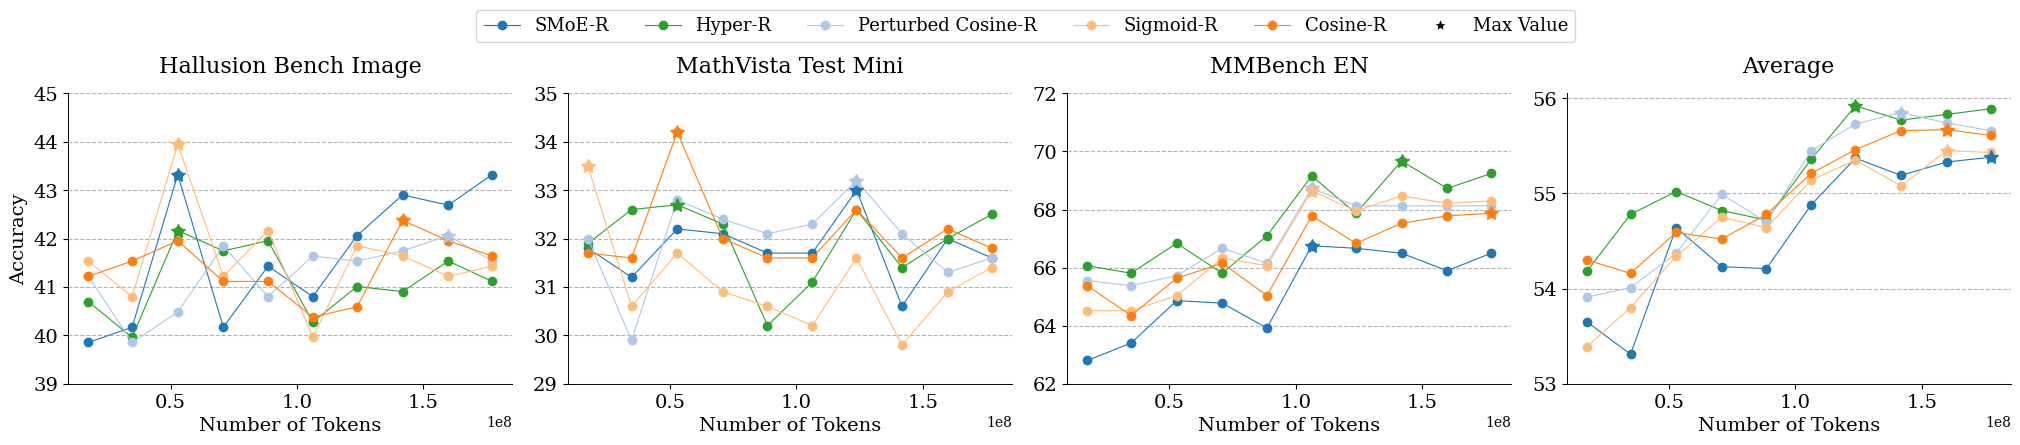

In [52]:
# Assuming `results`, `moe2name`, `percent_data`, `label2id`, `label2id_stage`, `fontsize`, and `name_method` are already defined

# Define the mapping and create the figure
moe2name = {
    "smoe_cosinegating": "Cosine-R",
    "smoe_sigmoidgating": "Sigmoid-R",
    "hyperrouter": "Hyper-R",
    "smoe_perturbed": "Perturbed Cosine-R",
    "smoe": "SMoE-R"
}

# Adjust layout to 4 columns
n_cols = 4
n_rows = 1  # Calculate number of rows needed

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axs = axs.flatten()  # Flatten to iterate easily if n_rows > 1
colors = plt.get_cmap('tab20', 20)

# Define datasets for averaging
data_avgs = [
    'pope', 
    'mmbench_en_dev', 
    'mmstar', 
    'scienceqa_full', 
    'ai2d', 
    'mathvista_testmini', 
    'hallusion_bench_image', 
    'mmmu_val', 
    'textvqa_val', 
    'gqa',
]

# Store handles, labels for the unified legend, and stars data
handles_list = []
labels_list = []
stars_to_plot = []  # To store star plotting data

# Loop through the stages and data
for stage in results['phi3mini-clip'].keys():
    avg = {}
    # Initialize averages for 'avg'
    for per in percent_data:
        avg[per] = {
            'value': [],
            'num_input_tokens_seen': [],
            "total_flos": []
        }

    for data in name_method.keys():
        
        list_scores = []
        list_num_input_tokens_seen = []
        
        # Collect scores and num_input_tokens_seen for each data point
        for per in percent_data:
            if data == 'avg':
                continue
            try:
                score = results['phi3mini-clip'][stage][data][per]["score"]
            except:
                continue
            num_input_tokens_seen = results['phi3mini-clip'][stage][data][per]["num_input_tokens_seen"]
            
            # Compute averages for data_avgs items
            if data in data_avgs:
                avg[per]['value'].append(score)
                avg[per]['num_input_tokens_seen'].append(num_input_tokens_seen)
            # else:
            #     print(data)

            # Store individual scores and num_input_tokens_seen
            list_scores.append(score)
            list_num_input_tokens_seen.append(num_input_tokens_seen)
        
        if data not in benchmarks:
            continue
        
        # Plot data for each benchmark
        handle, = axs[label2id[data]].plot(
            list_num_input_tokens_seen, list_scores, marker='o', label=f'{moe2name[stage]}', color=colors(label2id_stage[stage]),  linewidth=0.8
        )
        # Set the title of the subplot to the name of the `data` variable
        axs[label2id[data]].set_title(f'{name_method[data]}', fontsize=fontsize + 2, pad=15)  # Increase pad to push title away

        # Collect maximum point data to plot stars later
        max_index = np.argmax(list_scores)
        stars_to_plot.append((axs[label2id[data]], list_num_input_tokens_seen[max_index], list_scores[max_index], colors(label2id_stage[stage])))
        
        # Collect handles and labels for the legend
        if moe2name[stage] not in labels_list:
            handles_list.append(handle)
            labels_list.append(f'{moe2name[stage]}')
        
    # Prepare and plot averages
    avg_num_input_tokens_seen = []
    avg_value = []
    
    for per in percent_data:
        avg_num_input_tokens_seen.append(np.mean(avg[per]['num_input_tokens_seen']))
        avg[per]['value'] = round(np.mean(avg[per]['value']), 2)
        avg_value.append(avg[per]['value'])
    # if "hyperrouter" in stage:
    #     print(avg_value)
    # Plot average data on the respective axis
    avg_handle, = axs[label2id['avg']].plot(
        avg_num_input_tokens_seen, avg_value, marker='o', color=colors(label2id_stage[stage]),  linewidth=0.8
    )
    
    # Collect maximum point data to plot stars for averages later
    max_index_avg = np.argmax(avg_value)
    stars_to_plot.append((axs[label2id['avg']], avg_num_input_tokens_seen[max_index_avg], avg_value[max_index_avg], colors(label2id_stage[stage])))

# Add stars after basic plots
for ax, x, y, color in stars_to_plot:
    ax.plot(
        x, y, marker='*', markersize=10, color=color
    )

# Set the title for the "Average" column
axs[label2id['avg']].set_title("Average", fontsize=fontsize + 2, pad=15)  # Increase pad to push title away

# Add legend for the stages at the top of the figure
legend_handles = handles_list + [plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='black', markersize=10, label='Max Value')]
legend_labels = labels_list + ["Max Value"]

# Adjust `bbox_to_anchor` to move the legend further from the plot title
fig.legend(
    handles=legend_handles, 
    labels=legend_labels, 
    loc='upper center', 
    fontsize=fontsize-1, 
    ncol=6, 
    bbox_to_anchor=(0.5, 1.1)  # Increase this value to move the legend further up
)

# Adjust subplots to control spacing around the figure
fig.subplots_adjust(top=0.85)  # Adjust `top` to allow more space above the subplots


# Adjust layout to prevent overlap with the plots
plt.tight_layout()

# Set labels for both X and Y axes in all cells
for i, ax in enumerate(axs):
    ax.set_xlabel(r"Number of Tokens", fontsize=fontsize)  # X-axis label for all cells using LaTeX
    if i % n_cols == 0:  # Set Y-axis label only for the first cell in each row
        ax.set_ylabel(r"Accuracy", fontsize=fontsize)  # Y-axis label font size using LaTeX
    ax.tick_params(axis='both', which='major', labelsize=fontsize)  # Tick labels font size
    
    # Manually round the y-ticks and set them
    rounded_y_ticks = np.round(ax.get_yticks()).astype(int)  # Round the y-ticks
    ax.set_yticks(np.unique(rounded_y_ticks))  # Set the unique, rounded y-ticks
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y)}'))  # Format y-ticks as integers
    
    # Ensure grid lines are enabled for all subplots
    ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.6)  # Add light gray dashed grid lines

    # Keep only the left and bottom spines, remove top and right for a cleaner look
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Adjust the line width of the left and bottom spines to make them thinner
    ax.spines['left'].set_linewidth(0.7)
    ax.spines['bottom'].set_linewidth(0.7)

# Ensure the plot is fully rendered
plt.draw()

# Save the figure as PDF and PNG with appropriate adjustments
plt.savefig("/cm/shared/anonymous_H102/toolkitmoe/evaluate/analysis/results/timelearnmetric_4_benchmarks.pdf", format='pdf', bbox_inches='tight', dpi=300)
plt.savefig("./results/timelearnmetric_4_benchmarks.png", format='png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


In [53]:
benchmarks =[
    'ai2d',
 'textvqa_val',
 'gqa',
 'hallusion_bench_image',
 'mathvista_testmini',
 'mmbench_en_dev',
 'mmmu_val',
 'mmstar',
 'pope',
 'scienceqa_full',
 'mme'
 ]
import random

# Initialize label2id and label2id_stage dictionaries
label2id = {}
for i, label in enumerate(benchmarks):
    label2id[label] = i

# label2id_stage = {}
# for i, label in enumerate(results['phi3mini-clip'].keys()):
#     # Add a random number between 1 and 10 to each stage index
#     label2id_stage[label] = i + random.randint(1, 10)

label2id_stage = {'smoe': 0,
 'hyperrouter': 4,
 'smoe_perturbed': 1,
 'smoe_sigmoidgating': 3,
 'smoe_cosinegating': 2}
label2id['avg'] = len(label2id) 

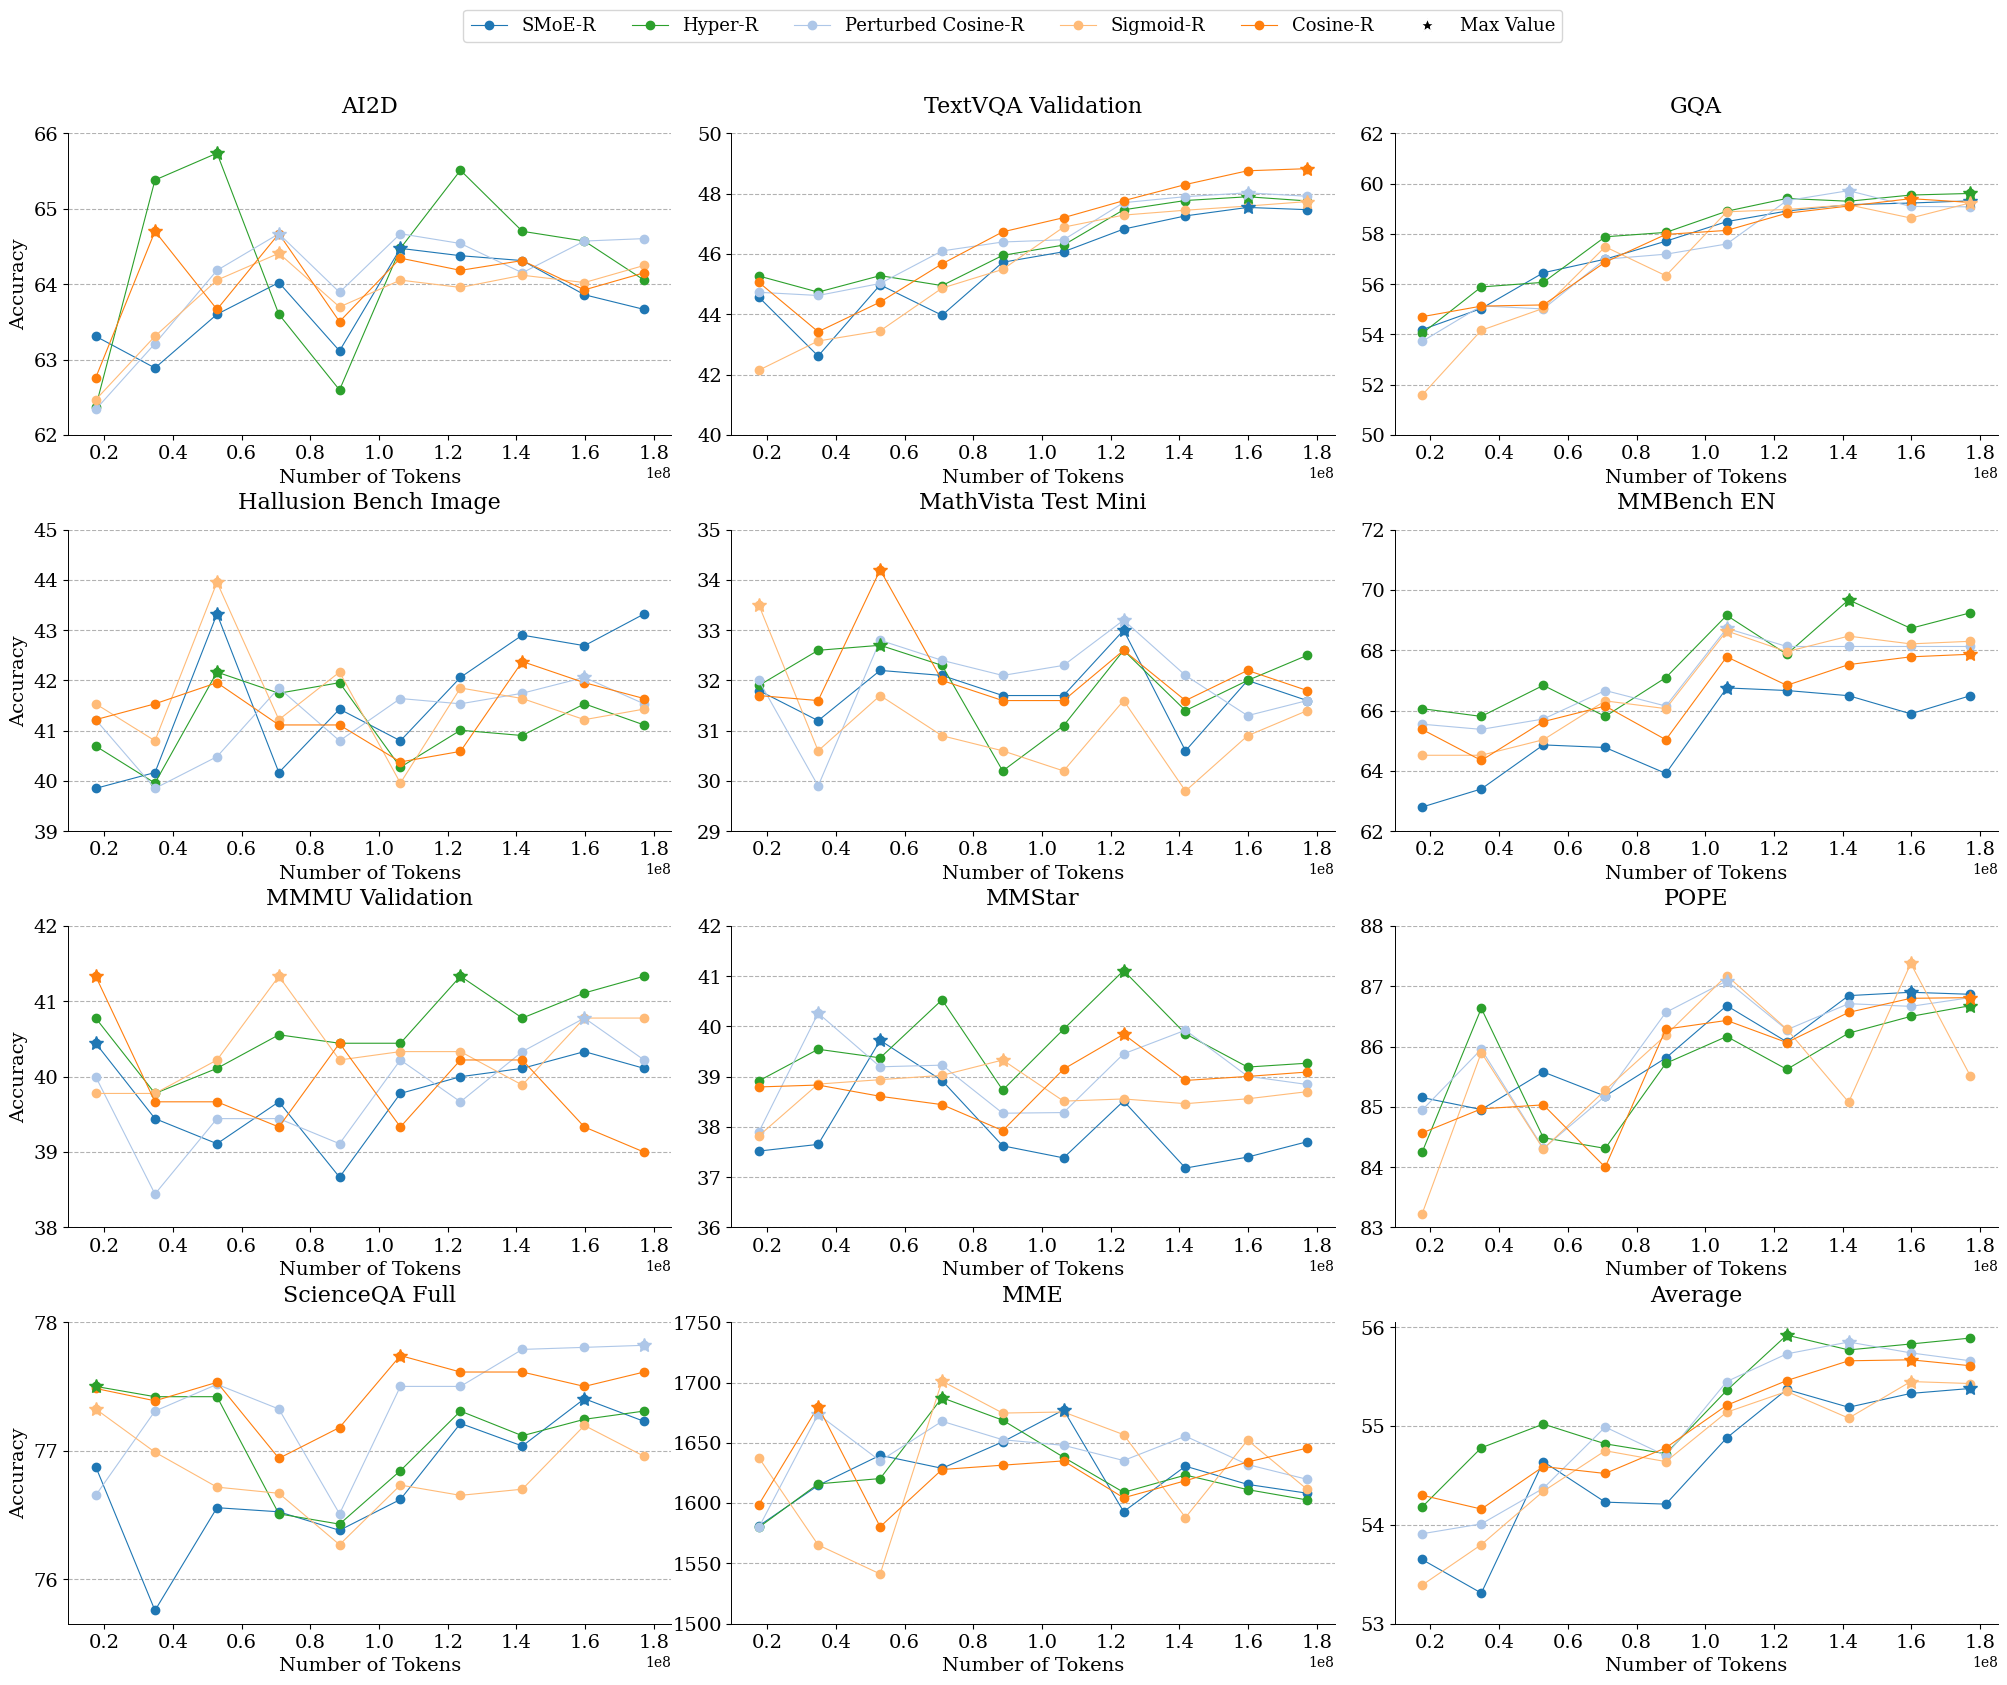

In [54]:
# Assuming `results`, `moe2name`, `percent_data`, `label2id`, `label2id_stage`, `fontsize`, and `name_method` are already defined

# Define the mapping and create the figure
moe2name = {
    "smoe_cosinegating": "Cosine-R",
    "smoe_sigmoidgating": "Sigmoid-R",
    "hyperrouter": "Hyper-R",
    "smoe_perturbed": "Perturbed Cosine-R",
    "smoe": "SMoE-R"
}

# Adjust layout to 4 columns
n_cols = 3
n_rows = (len(label2id.keys()) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axs = axs.flatten()  # Flatten to iterate easily if n_rows > 1
colors = plt.get_cmap('tab20', 20)

# Define datasets for averaging
data_avgs = [
    'pope', 
    'mmbench_en_dev', 
    'mmstar', 
    'scienceqa_full', 
    'ai2d', 
    'mathvista_testmini', 
    'hallusion_bench_image', 
    'mmmu_val', 
    'textvqa_val', 
    'gqa',
]

# Store handles, labels for the unified legend, and stars data
handles_list = []
labels_list = []
stars_to_plot = []  # To store star plotting data

# Loop through the stages and data
for stage in results['phi3mini-clip'].keys():
    avg = {}
    # Initialize averages for 'avg'
    for per in percent_data:
        avg[per] = {
            'value': [],
            'num_input_tokens_seen': [],
            "total_flos": []
        }

    for data in name_method.keys():
        
        list_scores = []
        list_num_input_tokens_seen = []
        
        # Collect scores and num_input_tokens_seen for each data point
        for per in percent_data:
            if data == 'avg':
                continue
            try:
                score = results['phi3mini-clip'][stage][data][per]["score"]
            except:
                continue
            num_input_tokens_seen = results['phi3mini-clip'][stage][data][per]["num_input_tokens_seen"]
            
            # Compute averages for data_avgs items
            if data in data_avgs:
                avg[per]['value'].append(score)
                avg[per]['num_input_tokens_seen'].append(num_input_tokens_seen)
            # else:
            #     print(data)

            # Store individual scores and num_input_tokens_seen
            list_scores.append(score)
            list_num_input_tokens_seen.append(num_input_tokens_seen)
        
        if data not in benchmarks:
            continue
        
        # Plot data for each benchmark
        handle, = axs[label2id[data]].plot(
            list_num_input_tokens_seen, list_scores, marker='o', label=f'{moe2name[stage]}', color=colors(label2id_stage[stage]),  linewidth=0.8
        )
        # Set the title of the subplot to the name of the `data` variable
        axs[label2id[data]].set_title(f'{name_method[data]}', fontsize=fontsize + 2, pad=15)  # Increase pad to push title away

        # Collect maximum point data to plot stars later
        max_index = np.argmax(list_scores)
        stars_to_plot.append((axs[label2id[data]], list_num_input_tokens_seen[max_index], list_scores[max_index], colors(label2id_stage[stage])))
        
        # Collect handles and labels for the legend
        if moe2name[stage] not in labels_list:
            handles_list.append(handle)
            labels_list.append(f'{moe2name[stage]}')
        
    # Prepare and plot averages
    avg_num_input_tokens_seen = []
    avg_value = []
    
    for per in percent_data:
        avg_num_input_tokens_seen.append(np.mean(avg[per]['num_input_tokens_seen']))
        avg[per]['value'] = round(np.mean(avg[per]['value']), 2)
        avg_value.append(avg[per]['value'])
    # if "hyperrouter" in stage:
    #     print(avg_value)
    # Plot average data on the respective axis
    avg_handle, = axs[label2id['avg']].plot(
        avg_num_input_tokens_seen, avg_value, marker='o', color=colors(label2id_stage[stage]),  linewidth=0.8
    )
    
    # Collect maximum point data to plot stars for averages later
    max_index_avg = np.argmax(avg_value)
    stars_to_plot.append((axs[label2id['avg']], avg_num_input_tokens_seen[max_index_avg], avg_value[max_index_avg], colors(label2id_stage[stage])))

# Add stars after basic plots
for ax, x, y, color in stars_to_plot:
    ax.plot(
        x, y, marker='*', markersize=10, color=color
    )

# Set the title for the "Average" column
axs[label2id['avg']].set_title("Average", fontsize=fontsize + 2, pad=15)  # Increase pad to push title away

# Add legend for the stages at the top of the figure
legend_handles = handles_list + [plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='black', markersize=10, label='Max Value')]
legend_labels = labels_list + ["Max Value"]

# Adjust `bbox_to_anchor` to bring the legend closer to the plot
fig.legend(
    handles=legend_handles, 
    labels=legend_labels, 
    loc='upper center', 
    fontsize=fontsize-1, 
    ncol=6, 
    bbox_to_anchor=(0.5, 1.05)  # Move this value closer to 1 to reduce the space
)

# Adjust subplots to control spacing around the figure
fig.subplots_adjust(top=0.9)  # Adjust `top` to control space above subplots and bring the legend closer

# Adjust layout to prevent overlap with the plots
plt.tight_layout()

# Set labels for both X and Y axes in all cells
for i, ax in enumerate(axs):
    ax.set_xlabel(r"Number of Tokens", fontsize=fontsize)  # X-axis label for all cells using LaTeX
    if i % n_cols == 0:  # Set Y-axis label only for the first cell in each row
        ax.set_ylabel(r"Accuracy", fontsize=fontsize)  # Y-axis label font size using LaTeX
    ax.tick_params(axis='both', which='major', labelsize=fontsize)  # Tick labels font size
    
    # Manually round the y-ticks and set them
    rounded_y_ticks = np.round(ax.get_yticks()).astype(int)  # Round the y-ticks
    ax.set_yticks(np.unique(rounded_y_ticks))  # Set the unique, rounded y-ticks
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y)}'))  # Format y-ticks as integers
    
    # Ensure grid lines are enabled for all subplots
    ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.6)  # Add light gray dashed grid lines

    # Keep only the left and bottom spines, remove top and right for a cleaner look
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Adjust the line width of the left and bottom spines to make them thinner
    ax.spines['left'].set_linewidth(0.7)
    ax.spines['bottom'].set_linewidth(0.7)

# Ensure the plot is fully rendered
plt.draw()

# Save the figure as PDF and PNG with appropriate adjustments
plt.savefig("/cm/shared/anonymous_H102/toolkitmoe/evaluate/analysis/results/timelearnmetric_all_benchmarks.pdf", format='pdf', bbox_inches='tight', dpi=300)
plt.savefig("./results/timelearnmetric_4_benchmarks.png", format='png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


In [877]:
x  = True

In [752]:
not x

False

In [39]:
moe2name = {'smoe_cosinegating': 'Cosine-R',
 'smoe_sigmoidgating': 'Sigmoid-R',
 'hyperrouter': 'Hyper-R',
 'smoe_perturbed': 'Perturbed C-R',
 'smoe': 'SMoE-R'}

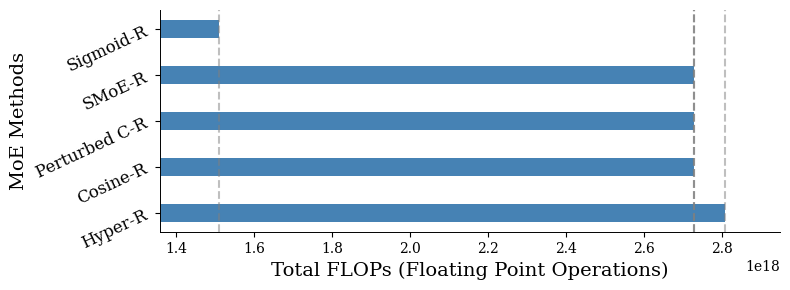

In [42]:
# Calculate the total FLOPs for the "mmbench_en" dataset
average_flops = {}
dataset_name = "mmbench_en_dev"
for method, datasets in total_flos.items():
    average_flops[method] = np.sum(datasets[dataset_name])

# Sort the methods by their total FLOPs in descending order
sorted_methods = sorted(average_flops.items(), key=lambda x: x[1], reverse=True)

# Extract sorted methods and their corresponding FLOPs
methods_sorted = [method for method, _ in sorted_methods]
averages_sorted = [flops for _, flops in sorted_methods]

# Prepare data for plotting
y = np.arange(len(methods_sorted))  # Create positions for the methods
width = 0.4  # Reduced width of the bars


# Plotting
fig, ax = plt.subplots(figsize=(8, 3))

# Create a horizontal bar for each method with spacing
ax.barh(y, averages_sorted, height=width, label="mmbench_en_dev", color='steelblue')

# Add labels for the axes and title, and set custom y-axis tick labels
ax.set_xlabel('Total FLOPs (Floating Point Operations)', fontsize=fontsize)  # X-axis label, specify units clearly
ax.set_ylabel('MoE Methods', fontsize=fontsize)  # Set y-axis label to "MoE Approach"
ax.set_yticks(y)

# Rotate the y-axis labels by 25 degrees
ax.set_yticklabels([moe2name[stage] for stage in methods_sorted], fontsize=fontsize - 2, rotation=25)

# Set x-axis limits to start from a specified minimum value
ax.set_xlim(left=min(averages_sorted) * 0.9)  # Adjust as necessary to create space

# Add vertical dashed lines at each bar position to match the aesthetic of gridlines
for i in range(len(methods_sorted)):
    ax.axvline(x=averages_sorted[i], color='gray', linestyle='--', alpha=0.5)

# Keep only the left and bottom spines, remove top and right for a cleaner look
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Adjust the line width of the left and bottom spines to make them thinner
ax.spines['left'].set_linewidth(0.7)
ax.spines['bottom'].set_linewidth(0.7)

# Save the plot as a PDF
plt.savefig("./results/flos.pdf", format='pdf', bbox_inches='tight')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

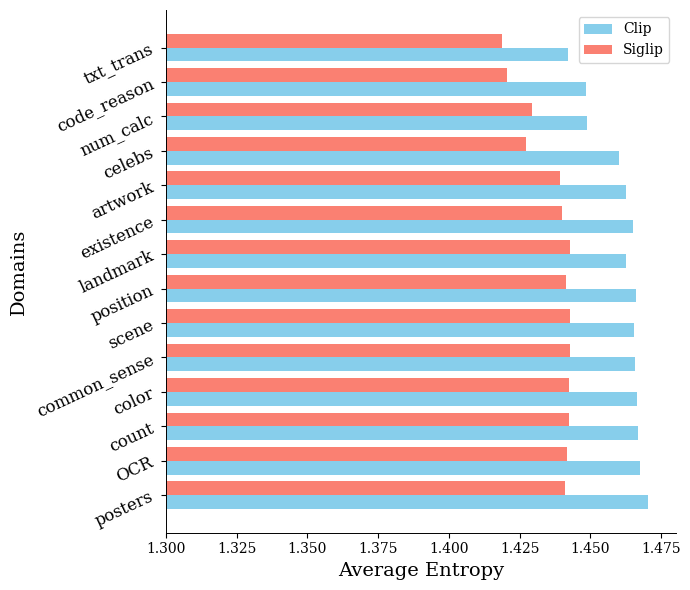

In [ ]:
entropy_data_subtasks_clip_siglip = None
with open("./entropy_scores_cache.json", 'r') as f:
    entropy_data_subtasks_clip_siglip = json.load(f)

### Behavior of MOE with amount of the data

In [910]:
# Step 1: Read data from a JSON file
file_path = "./results/expert_selection_change_results.json"
file_out = "./results/expert_selection_change_results.pdf"

# Đọc dữ liệu từ file JSON
with open(file_path, "r") as f:
    data = json.load(f)

# Khởi tạo các phương pháp MOE và tập dữ liệu
moe_methods = ["smoe_perturbed", "hyperrouter", "smoe_cosinegating", "smoe"]

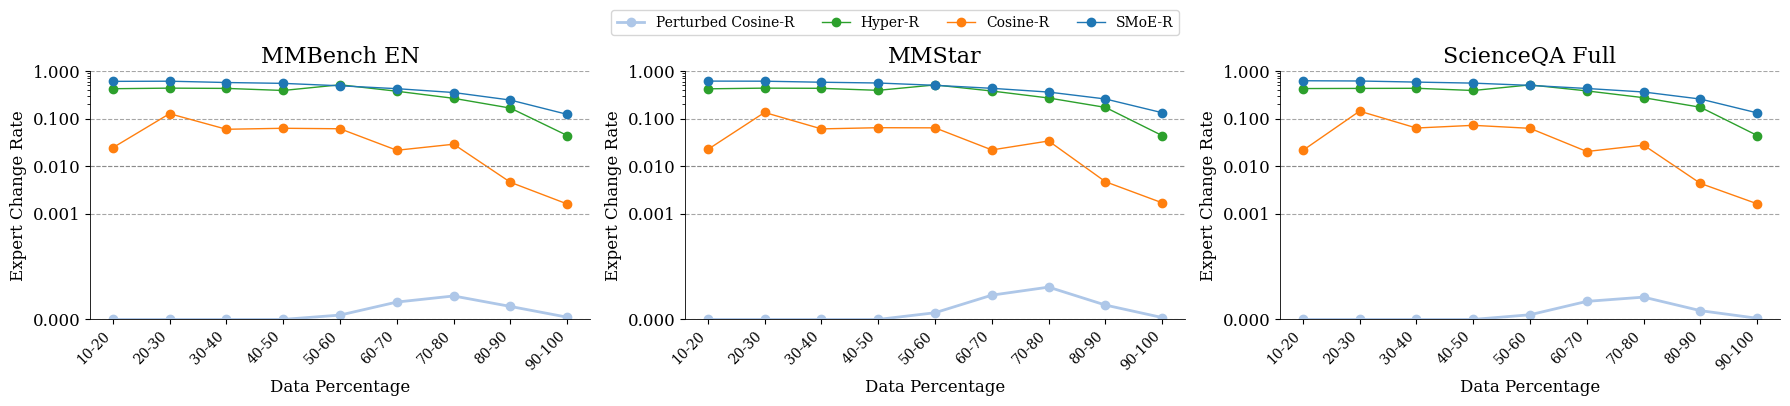

In [915]:
from matplotlib.ticker import ScalarFormatter, MultipleLocator
import matplotlib.pyplot as plt

# Define datasets and other variables as needed
datasets = ["mmbench_en_dev", "mmstar", "scienceqa_full"]
percent_compare_short = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create the figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Store handles and labels for the unified legend
handles_list = []
labels_list = []

# Plot the data for each dataset
for idx, dataset in enumerate(datasets):
    ax = axs[idx]  # Select the current subplot

    for method in moe_methods:
        if dataset in data[method]:
            checkpoints = list(data[method][dataset].keys())  # X-axis: Original checkpoints
            values = list(data[method][dataset].values())  # Y-axis: Performance values
            line, = ax.plot(checkpoints, values, marker='o', label=moe2name[method], color=colors(label2id_stage[method]), linewidth=2 if method == "smoe_perturbed" else 1, markersize=6)
            
            # Store the handle and label only if it’s not already in the list (to avoid duplicates)
            if moe2name[method] not in labels_list:
                handles_list.append(line)
                labels_list.append(moe2name[method])

    # Set titles and labels with font size adjustments
    ax.set_title(f'{name_method[dataset]}', fontsize=fontsize + 2)
    ax.set_xlabel('Data Percentage', fontsize=fontsize - 2)
    ax.set_ylabel('Expert Change Rate', fontsize=fontsize - 2)
    ax.set_xticks(range(len(percent_compare_short)))
    ax.set_xticklabels(percent_compare_short, rotation=45, ha='right', fontsize=fontsize - 4)
    ax.tick_params(axis='y', labelsize=fontsize - 2)

    # Configure y-axis scale and limits
    ax.set_yscale('symlog', linthresh=0.001, linscale=2.0)
    ax.set_ylim(0, 1)

    # Configure y-axis formatter to disable scientific notation
    scalar_formatter = ScalarFormatter()
    scalar_formatter.set_useOffset(False)
    scalar_formatter.set_scientific(False)
    ax.yaxis.set_major_formatter(scalar_formatter)
    
    # Set minor ticks for better granularity
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))

    # Add a horizontal dashed line at y=0.01
    ax.axhline(y=0.01, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)

    # Remove top and right spines, make left and bottom spines thinner
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_linewidth(0.6)
    ax.spines['bottom'].set_linewidth(0.6)
    
    # Enable grid lines for the Y-axis
    ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.7)

# Create a single legend for all subplots above the figure
fig.legend(handles=handles_list, labels=labels_list, loc='upper center', fontsize=fontsize - 4, ncol=len(handles_list), bbox_to_anchor=(0.5, 1.02))

# Adjust layout and leave room for the legend
plt.tight_layout()
fig.subplots_adjust(top=0.85)  # Adjust as needed to prevent the legend from being cut off

# Save the figure
plt.savefig(file_out, format='pdf', bbox_inches='tight')  # Save with bounding box to include the legend
plt.show()


In [33]:
entropy_data_subtasks_clip_siglip = None
with open("./entropy_scores_cache.json", 'r') as f:
    entropy_data_subtasks_clip_siglip = json.load(f)

In [34]:
entropy_data_subtasks_clip_siglip

{'clip': {'smoe': {'code_reasoning': [1.9929951325223296,
    1.9842074072851614,
    1.9927857112730445,
    1.9968779916203334,
    1.9872638518716876,
    1.99085868882749,
    1.991890301419202,
    1.9887398181841551,
    1.9883624709037289,
    1.9848998453898907,
    1.988116295696425,
    1.9916761750213623,
    1.998793615281723,
    1.9942106226412113,
    1.9962814322996338,
    1.9966721435898345,
    1.9960018414149294,
    1.9788083761120372,
    1.9874781905960293,
    1.994873527957785,
    1.9853122303651358,
    1.993868468407908,
    1.9926757740730707,
    1.9960491504911324],
   'artwork': [1.9928925053200794,
    1.9867801095135824,
    1.9985195488240737,
    1.9981829861662943,
    1.9860233832914884,
    1.9932310410697802,
    1.9890825276719184,
    1.9962820968664416,
    1.9980953612566388,
    1.9937830046302167,
    1.9988971208285455,
    1.9964131672630374,
    1.9945420684688084,
    1.9878377736847002,
    1.9933820847223256,
    1.9941279217883663,
 

In [35]:

# Sample entropy data for Clip and Siglip across methods and domains (subtasks)
domains = list(entropy_data_subtasks_clip_siglip['clip']['smoe'].keys())
domains

['code_reasoning',
 'artwork',
 'celebrity',
 'numerical_calculation',
 'text_translation',
 'count',
 'color',
 'commonsense_reasoning',
 'position',
 'OCR',
 'landmark',
 'scene',
 'existence',
 'posters']

In [36]:
data_clipsiglip = {}
for vision_encoder in entropy_data_subtasks_clip_siglip.keys():
    data_clipsiglip[vision_encoder] = {}
    for moe_method in entropy_data_subtasks_clip_siglip[vision_encoder].keys():
        data_clipsiglip[vision_encoder][moe_method] = {}
        for subtask in entropy_data_subtasks_clip_siglip[vision_encoder][moe_method].keys():
            data_clipsiglip[vision_encoder][moe_method][subtask] = np.mean(entropy_data_subtasks_clip_siglip[vision_encoder][moe_method][subtask])

In [37]:

# Sample entropy data for Clip and Siglip across methods and domains (subtasks)
domains = list(entropy_data_subtasks_clip_siglip['clip']['smoe'].keys())
domains

['code_reasoning',
 'artwork',
 'celebrity',
 'numerical_calculation',
 'text_translation',
 'count',
 'color',
 'commonsense_reasoning',
 'position',
 'OCR',
 'landmark',
 'scene',
 'existence',
 'posters']

/tmp/ipykernel_249902/3216724236.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted_domains, ha='right', fontsize=fontsize-2)
/tmp/ipykernel_249902/3216724236.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted_domains, ha='right', fontsize=fontsize-2)
/tmp/ipykernel_249902/3216724236.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted_domains, ha='right', fontsize=fontsize-2)
/tmp/ipykernel_249902/3216724236.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted_domains, ha='right', fontsize=fontsize-2)


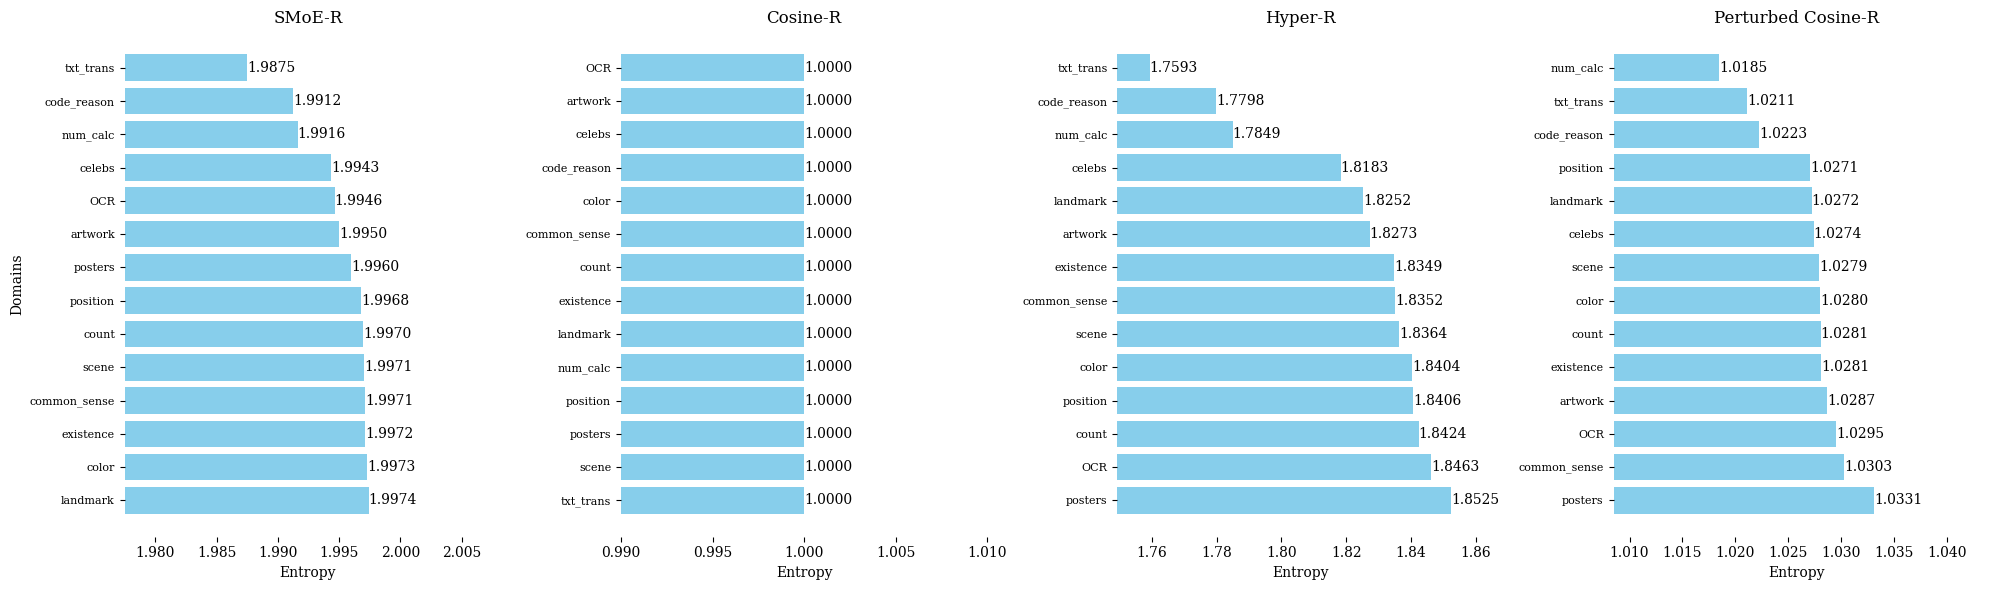

/tmp/ipykernel_249902/3216724236.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted_domains, ha='right', fontsize=fontsize-2)
/tmp/ipykernel_249902/3216724236.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted_domains, ha='right', fontsize=fontsize-2)
/tmp/ipykernel_249902/3216724236.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted_domains, ha='right', fontsize=fontsize-2)
/tmp/ipykernel_249902/3216724236.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted_domains, ha='right', fontsize=fontsize-2)


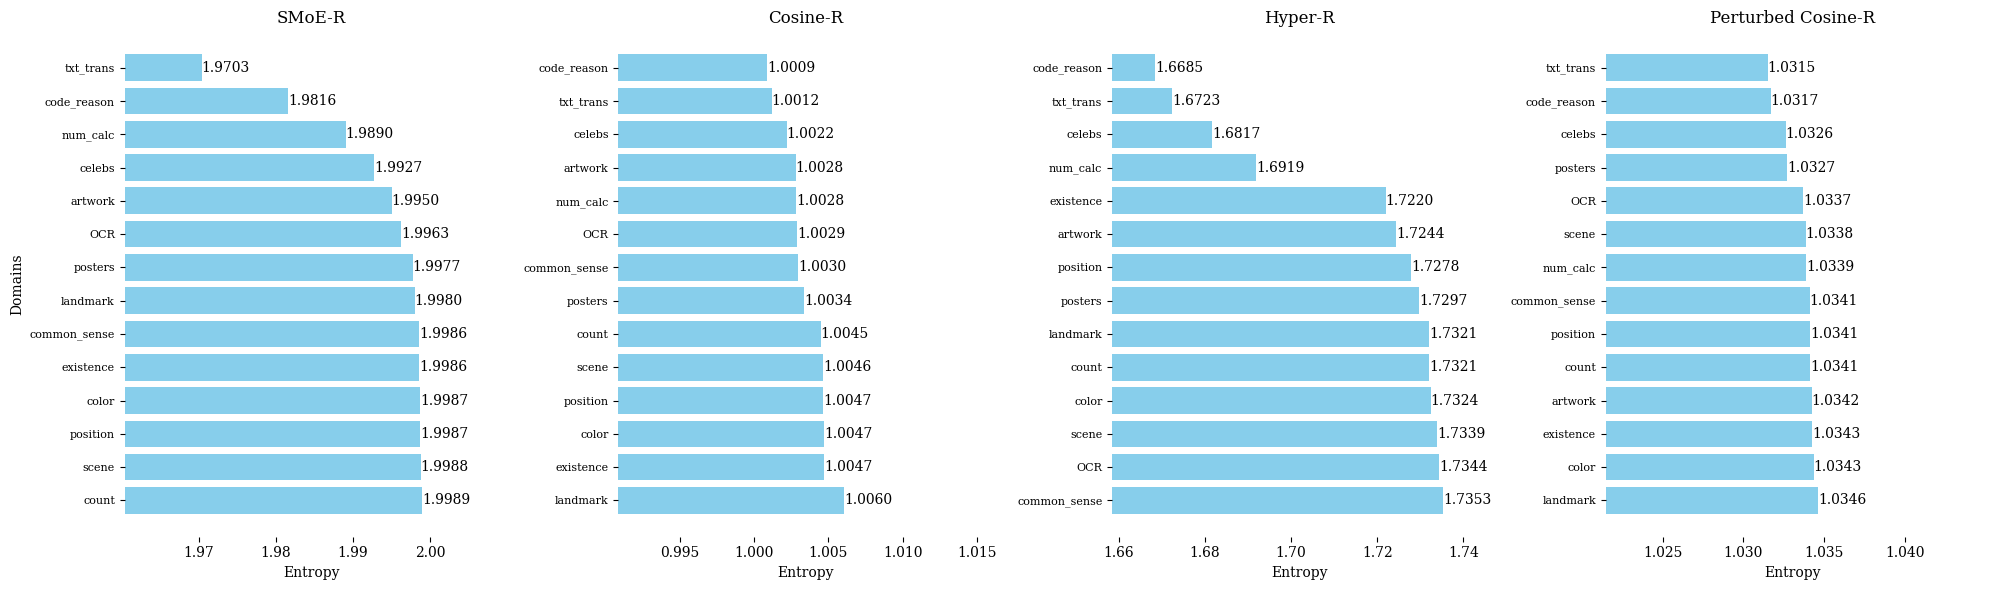

In [67]:

# Define a dictionary to map original domain names to shortened ones
domain_abbreviations = {
    'celebrity': 'celebs',
    'code_reasoning': 'code_reason',
    'commonsense_reasoning': 'common_sense',
    'numerical_calculation': 'num_calc',
    'text_translation': 'txt_trans',
    # Các tên khác giữ nguyên
}

for model_name in data_clipsiglip.keys():
    score_entropy_moes = data_clipsiglip[model_name]
    
    # Visualization of the calculated entropy for each stage in a bar chart
    fig, axes = plt.subplots(1, 4, figsize=(20, 6))  # Create a 1x4 subplot layout
    
    # Plot each stage's entropy values in separate subplots
    for i, (stage, scores) in enumerate(score_entropy_moes.items()):
        ax = axes[i]  # Select the subplot for the current stage
        domains = list(scores.keys())
        entropy_values = list(scores.values())

        # Apply abbreviations to domain names
        abbreviated_domains = [domain_abbreviations.get(domain, domain) for domain in domains]

        # Sort the domains by entropy value in descending order
        sorted_pairs = sorted(zip(entropy_values, abbreviated_domains), reverse=True)
        sorted_entropy_values, sorted_domains = zip(*sorted_pairs)

        # Remove the black border (spines) from the subplot
        for spine in ax.spines.values():
            spine.set_visible(False)  # Remove all the spines

        # Create a horizontal bar chart
        bars = ax.barh(sorted_domains, sorted_entropy_values, color='skyblue')
        for index, value in enumerate(sorted_entropy_values):
            ax.text(value, index, f'{value:.4f}', va='center')

        # Configure axes labels and titles
        ax.set_xlim(min(sorted_entropy_values) - 0.01, max(sorted_entropy_values) + 0.01)

        # Set titles based on the router type
        if "pertur" in stage:
            stage = "Perturbed Cosine-R"
        elif "cosin" in stage:
            stage = "Cosine-R"
        elif "hyper" in stage:
            stage = "Hyper-R"
        else:
            stage = "SMoE-R"
        
        ax.set_title(f'{stage}', fontsize=fontsize + 2)
        ax.set_xlabel('Entropy', fontsize=fontsize)
        if i == 0:
            ax.set_ylabel('Domains', fontsize=fontsize)

        # Tilt the y-axis labels by 25 degrees and set fontsize
        ax.set_yticklabels(sorted_domains, ha='right', fontsize=fontsize-2)

    # Adjust layout and save the final figure
    plt.tight_layout()
    plt.savefig(f"./results/entropy_{model_name}.png", format='png')
    plt.savefig(f"./results/entropy_{model_name}.pdf", format='pdf')
    plt.show()


In [44]:
data_clipsiglip

{'clip': {'smoe': {'code_reasoning': 1.991237460968552,
   'artwork': 1.9949864837645481,
   'celebrity': 1.994327924760837,
   'numerical_calculation': 1.9916121515117204,
   'text_translation': 1.9875010731498037,
   'count': 1.9969782036841799,
   'color': 1.997260831501065,
   'commonsense_reasoning': 1.997125751373319,
   'position': 1.9968038098769043,
   'OCR': 1.9946379542691155,
   'landmark': 1.9974007611530997,
   'scene': 1.9970555513946973,
   'existence': 1.9971508030729417,
   'posters': 1.9959939904233623},
  'cosine': {'code_reasoning': 1.0,
   'artwork': 1.0,
   'celebrity': 1.0,
   'numerical_calculation': 1.0,
   'text_translation': 1.0,
   'count': 1.0,
   'color': 1.0,
   'commonsense_reasoning': 1.0,
   'position': 1.0,
   'OCR': 1.0,
   'landmark': 1.0,
   'scene': 1.0,
   'existence': 1.0,
   'posters': 1.0},
  'hyper': {'code_reasoning': 1.7798234306269345,
   'artwork': 1.827292967409637,
   'celebrity': 1.818326942040174,
   'numerical_calculation': 1.784925

In [55]:
height = 0.35  # Chiều cao của mỗi cột
vision_encoder = {
    "clip": {}, 
    "siglip": {}
}
for idx, method in enumerate(data_clipsiglip['clip'].keys()):
   
    for vis in vision_encoder.keys():
        if method not in vision_encoder[vis].keys():
            print(1)
            vision_encoder[vis][method] = np.array([data_clipsiglip[vis][method][task] for task in domains])
        else: 
            vision_encoder[vis][method] += np.array([data_clipsiglip[vis][method][task] for task in domains])
        vision_encoder[vis][method] = np.mean(vision_encoder[vis][method])

1
1
1
1
1
1
1
1


In [68]:
data_clipsiglip['clip'].keys()

dict_keys(['smoe', 'cosine', 'hyper', 'perturbed'])

In [69]:
moe2name = {
    "cosine": "Cosine-R",
    "smoe_sigmoidgating" : "Sigmoid-R",
    "hyper": "Hyper-R",
    "perturbed": "Perturbed Cosine-R",
    "smoe": "SMoE-R"

}

In [57]:
# for vis in vision_encoder.keys():
#     vision_encoder[vis] /= len(data_clipsiglip['clip'].keys())
# vision_encoder

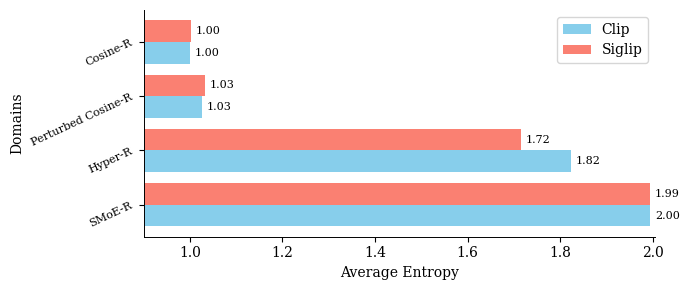

In [71]:


# Data provided
avg_entropy = vision_encoder
# Define domain abbreviations
domain_abbreviations = {
    'celebrity': 'celebs',
    'code_reasoning': 'code_reason',
    'commonsense_reasoning': 'common_sense',
    'numerical_calculation': 'num_calc',
    'text_translation': 'txt_trans',
    # Other names are kept unchanged
}

# Processing the data for sorting
domains = list(avg_entropy['clip'].keys())
clip_values = np.array(list(avg_entropy['clip'].values()))
siglip_values = np.array(list(avg_entropy['siglip'].values()))

# Combined entropy
combined_entropy = clip_values + siglip_values
sorted_indices = np.argsort(combined_entropy)[::-1]

# Sorting the domains and entropy values
sorted_domains = [domains[i] for i in sorted_indices]
abbreviated_sorted_domains = [domain_abbreviations.get(domain, domain) for domain in sorted_domains]
sorted_clip_entropy = clip_values[sorted_indices]
sorted_siglip_entropy = siglip_values[sorted_indices]

# Adjusted code to add values on top of each bar

# Plotting the data as a grouped horizontal bar chart with values
fig, ax = plt.subplots(figsize=(7, 3))
bar_width = 0.4
y_pos = np.arange(len(abbreviated_sorted_domains))

# Plotting the bars for 'clip' and 'siglip'
clip_bars = ax.barh(y_pos - bar_width/2, sorted_clip_entropy, bar_width, label='Clip', color='skyblue')
siglip_bars = ax.barh(y_pos + bar_width/2, sorted_siglip_entropy, bar_width, label='Siglip', color='salmon')

# Customizing the plot
fontsize = 10
ax.set_xlabel('Average Entropy', fontsize=fontsize)
ax.set_ylabel('Domains', fontsize=fontsize)
ax.set_yticks(y_pos)
ax.set_yticklabels([moe2name[x] for x in abbreviated_sorted_domains], rotation=25, ha='right', fontsize=fontsize-2)

# Adding values on top of each bar
for bar in clip_bars:
    ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
            f'{bar.get_width():.2f}', va='center', fontsize=fontsize-2)

for bar in siglip_bars:
    ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
            f'{bar.get_width():.2f}', va='center', fontsize=fontsize-2)

# Adding legend
ax.legend(loc='best')

# Set the x-axis limit to start from a custom threshold
custom_threshold = 0.9
ax.set_xlim([custom_threshold, max(sorted_clip_entropy.max(), sorted_siglip_entropy.max()) + 0.01])

# Adjusting the plot spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_linewidth(0.7)
ax.spines['bottom'].set_linewidth(0.7)

output_pdf = "./results/compare_entropy_siglip_clip.pdf"
# Show the plot
plt.tight_layout()  # Đảm bảo rằng bố cục không bị tràn
plt.savefig(output_pdf, format='pdf')  # Lưu biểu đồ dưới dạng PDF
plt.show()



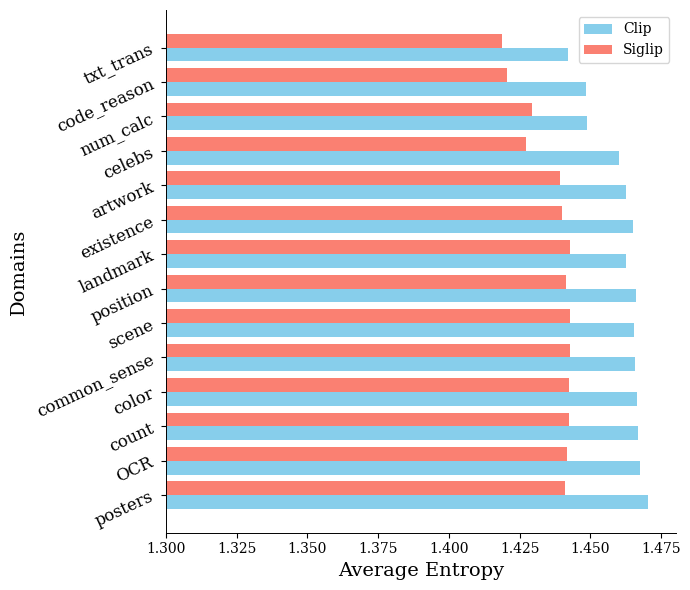

In [42]:
entropy_data_subtasks_clip_siglip = None
with open("./entropy_scores_cache.json", 'r') as f:
    entropy_data_subtasks_clip_siglip = json.load(f)

In [916]:
entropy_data_subtasks_confi = None
with open("./results/confident_metric_entropy_values_top1.json", 'r') as f:
    entropy_data_subtasks_confi = json.load(f)

In [917]:
entropy_data_subtasks_confi.keys()

dict_keys(['smoe', 'smoe_cosinegating', 'smoe_perturbed', 'hyperrouter'])

In [918]:
domains = list(entropy_data_subtasks_confi['smoe'].keys())
domains

['code_reasoning',
 'artwork',
 'celebrity',
 'numerical_calculation',
 'text_translation',
 'count',
 'color',
 'commonsense_reasoning',
 'position',
 'OCR',
 'landmark',
 'scene',
 'existence',
 'posters']

In [919]:
data_confi= {}
for moe_method in entropy_data_subtasks_confi.keys():
    data_confi[moe_method] = {}
    for subtask in entropy_data_subtasks_confi[moe_method].keys():
        data_confi[moe_method][subtask] = np.mean(entropy_data_subtasks_confi[moe_method][subtask])

In [920]:
subtasks = [
    'code_reasoning', 'artwork', 'celebrity', 'numerical_calculation',
    'text_translation', 'count', 'color', 'commonsense_reasoning',
    'position', 'OCR', 'landmark', 'scene', 'existence', 'posters'
]

# Define groups based on the categories seen in the image
subtask_groups = {
    "Perception (Coarse-Grained Tasks)": [
        "existence", "count", "position", "color"
    ],
    "Perception (Fine-Grained Tasks)": [
        "posters", "celebrity", "scene", "landmark", "artwork"
    ],
    "Perception (OCR Task)": [
        "OCR"
    ],
    "Cognition (Reasoning Tasks)": [
        "commonsense_reasoning", "numerical_calculation", "text_translation", "code_reasoning"
    ]
}

# Display the groups
for category, subtasks_in_group in subtask_groups.items():
    print(f"{category}: {subtasks_in_group}")


Perception (Coarse-Grained Tasks): ['existence', 'count', 'position', 'color']
Perception (Fine-Grained Tasks): ['posters', 'celebrity', 'scene', 'landmark', 'artwork']
Perception (OCR Task): ['OCR']
Cognition (Reasoning Tasks): ['commonsense_reasoning', 'numerical_calculation', 'text_translation', 'code_reasoning']


/tmp/ipykernel_1093671/3832376721.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted_tasks, ha='right', fontsize=fontsize)
/tmp/ipykernel_1093671/3832376721.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted_tasks, ha='right', fontsize=fontsize)
/tmp/ipykernel_1093671/3832376721.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted_tasks, ha='right', fontsize=fontsize)
/tmp/ipykernel_1093671/3832376721.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted_tasks, ha='right', fontsize=fontsize)


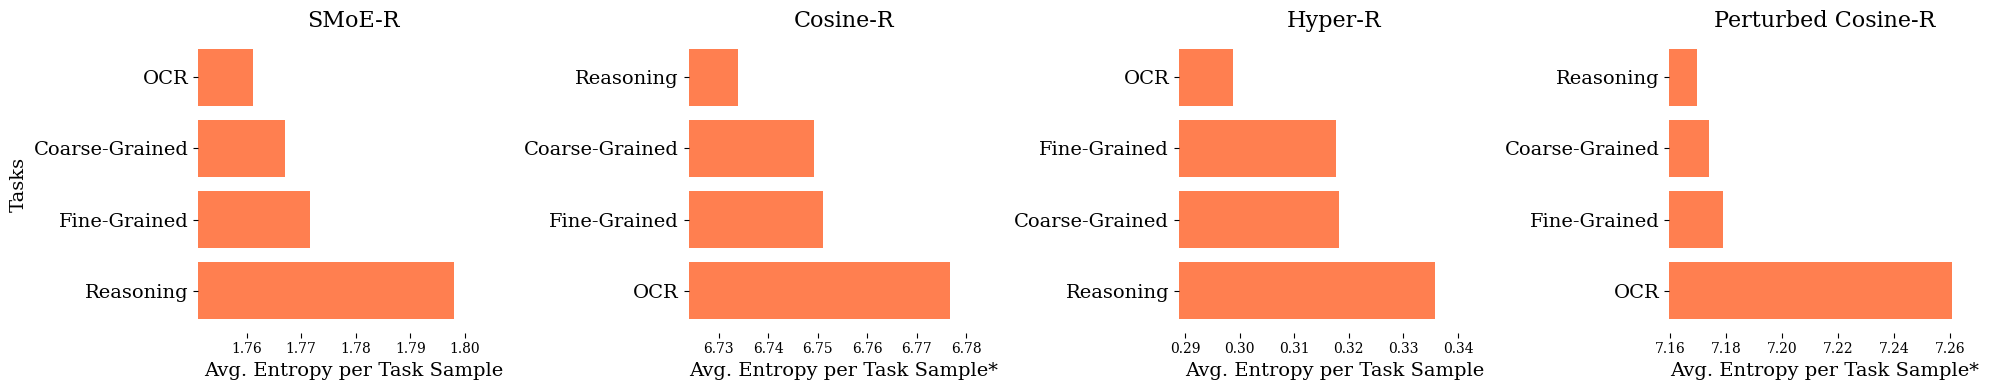

In [943]:
import matplotlib.pyplot as plt

# Define task group mappings
task_groups = {
    "Coarse-Grained": ["existence", "count", "position", "color"],
    "Fine-Grained": ["posters", "celebrity", "scene", "landmark", "artwork"],
    "OCR": ["OCR"],
    "Reasoning": ["commonsense_reasoning", "numerical_calculation", "text_translation", "code_reasoning"]
}

# Dictionary to map original domain names to shortened ones
domain_abbreviations = {
    'celebrity': 'celebs',
    'code_reasoning': 'code_reason',
    'commonsense_reasoning': 'common_sense',
    'numerical_calculation': 'num_calc',
    'text_translation': 'txt_trans',
}

# Data
score_entropy_moes = data_confi
stage_order = ["smoe", "smoe_cosinegating", "hyperrouter", "smoe_perturbed"]
stage_titles = ["SMoE-R", "Cosine-R", "Hyper-R", "Perturbed Cosine-R"]

# Group entropy scores by high-level tasks for each stage
grouped_entropy_scores = {}
for stage in stage_order:
    grouped_entropy_scores[stage] = {}
    scores = score_entropy_moes.get(stage, {})
    
    # Aggregate scores by task group
    for task, subtasks in task_groups.items():
        # Calculate the average entropy for each task group
        task_scores = [scores.get(domain, 0) for domain in subtasks]
        if task_scores:
            avg_entropy = sum(task_scores) / len(task_scores)
            adjusted_entropy = avg_entropy
            # Adjust only for visualization
            if stage in ['smoe_cosinegating', 'smoe_perturbed']: 
                adjusted_entropy = (avg_entropy - 1.999) * 10000
                # adjusted_entropy = avg_entropy
            grouped_entropy_scores[stage][task] = (avg_entropy, adjusted_entropy)

# Visualization of entropy for each stage in bar chart by task groups
fig, axes = plt.subplots(1, 4, figsize=(20, 4))  # Create a 1x4 subplot layout

# Adjust the x-axis label with a symbol to indicate scaling for specific stages
for i, stage in enumerate(stage_order):
    ax = axes[i]
    scores = grouped_entropy_scores.get(stage, {})
    tasks = list(scores.keys())
    entropy_values = [values[1] for values in scores.values()]  # Adjusted for plotting
    original_entropy_values = [values[0] for values in scores.values()]  # Original values for display

    # Sort the tasks by entropy value in descending order for better visualization
    sorted_pairs = sorted(zip(entropy_values, original_entropy_values, tasks), reverse=True)
    sorted_entropy_values, sorted_original_values, sorted_tasks = zip(*sorted_pairs)

    # Remove spines for a cleaner look
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Create a horizontal bar chart
    bars = ax.barh(sorted_tasks, sorted_entropy_values, color='coral')
    # for index, value in enumerate(sorted_original_values):
    #     ax.text(sorted_entropy_values[index], index, f'{value:.5f}', va='center')  # Display original values

    # Configure axes labels and titles
    ax.set_xlim(min(sorted_entropy_values) - 0.01, max(sorted_entropy_values) + 0.01)
    ax.set_title(stage_titles[i], fontsize=fontsize + 2)
    
    # Use a symbol to denote scaling, explained in the caption
    if stage in ['smoe_cosinegating', 'smoe_perturbed']: 
        ax.set_xlabel('Avg. Entropy per Task Sample*', fontsize=fontsize)
    else:
        ax.set_xlabel('Avg. Entropy per Task Sample', fontsize=fontsize)
    
    if i == 0:
        ax.set_ylabel('Tasks', fontsize=fontsize)

    # Set font size for y-axis labels
    ax.set_yticklabels(sorted_tasks, ha='right', fontsize=fontsize)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("./results/confi_entropy_task_ordered.png", format='png')
plt.savefig("./results/confi_entropy_task_ordered.pdf", format='pdf')
plt.show()
